# Um projeto completo de ciência de dados

Ciência de dados é uma área comumente descrita como a **interseção de estatística / matemática, computação e conhecimento sobre o domínio do problema a ser resolvido**.

Portanto, uma das formas mais interessantes de ter um primeiro contato com a área ou de desenvolver um projeto para colocar em portfólio pessoal é trabalhar com as chamadas soluções **end-to-end**, que abrangem desde as primeiras etapas do pipeline até o final. O pipeline de um projeto de ciência de dados pode ser, de forma simples, representado como:

![](https://i.imgur.com/ktXs0XP.png)

Então, meu nome é [Wesley Alves](https://www.linkedin.com/in/w-alves/) e neste kernel faremos um tour disctuindo conceitos das três áreas que compõem a ciência de dados e também cobriremos todo o pipeline de tarefas que normalmente são realizadas no **dia a dia de um profissional**. 

Fazendo um breve resumo, neste projeto você aprenderá sobre:

- 🧠 **Entendimento do problema**
- 🔎 **Amostragem**
- 🎲 **Manipulação de dados** 
- 📊 **Visualização de dados**
- 🤔 **Teste de hipótese**
- 🤖 **AutoML com PyCaret**                 
- 🐱 **Algoritmo CatBoost**                    
- 📈 **Métricas de avaliação para regressão**   
- 🧐 **Interpretabilidade com SHAP**          

Vários são os problemas que podem servir de base para a construção deste projeto. Aqui, foi escolhido um especial e, para começarmos, **imagine que o CEO da sua empresa venha e diga para você o seguinte**:

>“Ei, estava viajando pela web e encontrei algumas coisas sobre o ENEM. Depois de ler mais sobre isso, fiquei pensando se podemos tirar alguns insights dos dados fornecidos pelos organizadores do teste e talvez criar alguns solução que ajudará os alunos a planejarem em quais faculdades eles desejam se inscrever, antes mesmo de terem a pontuação oficial. O que você acha? "

Como uma pessoa que há muito busca uma oportunidade para explorar essa área de **data and analytics**, você aceita o "desafio" e decide primeiro tentar entender melhor o problema. Então vamos lá!

## Entendimento do problema

O **ENEM (Exame Nacional do Ensino Médio) é uma prova** realizada pelo INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira), órgão vinculado ao Ministério da Educação do Brasil, e foi criado em 1998. É utilizado para avaliar a qualidade do ensino médio no país e para **admissão em universidades**. Esta prova pode ser separada na **parte objetiva**(representada pelas questões a marcar nas quatro áreas do conhecimento) e na **parte da redação**(onde o aluno deve discorrer sobre um determinado tema) .

**Na parte objetiva, a pontuação é calculada por meio de um modelo matemático da Teoria de Resposta ao Item (TRI)**, em que cada questão é um item. Essa teoria considera a consistência da resposta para calcular a nota de acordo com o grau de dificuldade de cada questão. Por outro lado, **a parte da redação é corrigida manualmente por uma equipe de professores treinada para isso pelo próprio INEP.**

Assim, uma forma de ajudar os alunos a planejarem em quais faculdades querem se inscrever é tentando **estimar a nota oficial dada a quantidade de acertos no exame**. Para fazer essa estimativa, poderíamos tentar construir manualmente uma fórmula para essa tarefa, mas é muito mais interessante automatizar isso usando algum **modelo de aprendizado de máquina**. Isso nos permite entender **padrões e conexões entre os dados** que em uma análise pessoal estariam ocultos, potencializando os resultados alcançados.

Um detalhe importante a ser dito é que como o IRT existe e como o teste é diferente a cada ano, é natural que **haja uma pequena diferença nas notas em cada ano** (há anos que a média de matemática vem um pouco mais baixo, outros vem um pouco mais alto, etc). Com isso, é importante ressaltar que teremos **limitações quanto à precisão do nosso modelo**, pois sempre teremos acesso aos dados apenas do anterior. Uma maneira melhor de generalizar seria **trabalhar com todos os conjuntos de dados, digamos, dos últimos 5 anos**, mas aqui não vamos fazer isso, pois os fins são meramente **didáticos**.

Após esta análise prévia, agora podemos começar de fato a desenvolver nossa solução.

## Configurações iniciais

Primeiro, **importar** as bibliotecas necessárias.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct
import statsmodels.api as sm
from pycaret.regression import *

In [2]:
pd.set_option('mode.chained_assignment', None)

In [3]:
sns.set_style('whitegrid')

Em vez de carregar todo o conjunto de dados, aqui neste projeto, vamos escolher trabalhar com um **pequeno grupo de observações** dentro deste conjunto de dados, isso nos permitirá exercitar/aprender conceitos importantes que constantemente estaremos em contato como um cientista de dados, como **testes de hipótese** e **amostragem**.

Já começando a falar em amostragem, podemos dizer que é graças a essa ideia que pudemos fazer, por exemplo, pesquisas eleitorais, pesquisas de opinião e **estimar o resultado final com boa precisão mesmo quando falamos com um grupo muito pequeno de pessoas**. A amostragem é o **oposto da abordagem do censo**, que por sua vez é um processo que consiste em examinar todos os elementos da população.

![](https://i.imgur.com/nshe62j.png)

Para obter estatísticas precisas, mas sem necessariamente ter que realizar o processo mencionado acima, um conceito é importante e é o que basicamente norteia a tarefa de amostragem: **aleatoriedade**. Quando selecionamos aleatoriamente um número específico de indivíduos de uma população, podemos tornar essa amostra **representativa**, ou seja, podemos fazer com que esse subgrupo represente com precisão as características gerais da população.

Existem muitos métodos de amostragem, mas aqui usaremos a **amostragem aleatória simples**. Neste método, **qualquer grupo de n indivíduos tem a mesma probabilidade de ser selecionado de uma população N.**

Um fator muito importante a ser considerado quando se fala em amostragem é o **tamanho da amostra**, ou seja, quantas pessoas precisamos para representar bem toda a população? Para calcular este valor, existe uma **fórmula** e com ela podemos decidir o tamanho para que tenhamos o **nível de confiança** e a **margem de erro** desejada.

A **margem de erro** é um índice que estima o **erro máximo do resultado da pesquisa com base na amostra selecionada**. **Nível de confiança** indica a **probabilidade** de que se a pesquisa for aplicada a outro grupo de pessoas e dentro dos mesmos dados de amostra com a mesma faixa de erro, a pesquisa obterá o **mesmo resultado**.
A formula para calcular o tamanho da amostra é:

![](https://i.imgur.com/dm6Jd7V.png)

Onde $N$ = tamanho da população, $e$ = margem de rero (porcentagem no formato decimal), $p$ = proporção da amostra , $z$ = z-score

> O z score é um valor escolhido com base no nível de confiança desejada, cheque a tabela abaixo: 

![](https://i.imgur.com/aHku0CM.png)


Aqui, para nosso problema, escolheremos o **nível de confiança desejado como de 95%** e **0,5% para a margem de erro desejada**. Além disso, como vamos analisar várias coisas e não um efeito específico, é legal escolhermos um **valor conservador para p**, como 50%, que por sua vez nos dá o **maior tamanho possível para a amostra** .

Assim, temos que:

![](https://i.imgur.com/LPjZCY6.png)

Como no futuro provavelmente teremos que **remover algumas linhas que não somam para nossa análise**, vamos agora selecionar uma **amostra maior** com um tamanho aproximado de 0,011% de nossa população para subsequentemente **manter este valor mínimo de 38129 observações.**

In [4]:
np.random.seed(777)

In [5]:
df = pd.read_csv(
    'data/MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    sep=';',
    skiprows=lambda i: i>0 and np.random.rand() > 0.011,
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004712,2019,1500800,Ananindeua,15,PA,22,F,0,1,1,1500800.0,Ananindeua,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1500800,Ananindeua,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,D,E,B,5,D,A,D,E,B,A,B,A,B,A,B,A,A,B,A,A,E,A,D,B
1,190001004793,2019,1506807,Santarém,15,PA,16,M,1,0,1,1506807.0,Santarém,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,647.8,661.5,690.0,703.2,DADACEABCCCCBABBCEABCACDEACEEBAABEEAEADEADAEE,EEBCEEABADBCABABCAABCEBACDBBABCACACCAADEBBDAB,ADBBE99999ABBCBCDAAECDDDBAAAECADACDCAEDECAECBD...,DEEBABCACDAACEBEAEBBBAEDDDCBAABBABCBCEBDBADCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,200.0,200.0,180.0,180.0,160.0,920.0,F,G,D,D,7,I,A,E,E,C,A,D,D,B,B,A,A,A,E,B,B,E,A,D,B
2,190001004796,2019,1501402,Belém,15,PA,24,F,1,2,1,1501402.0,Belém,15.0,PA,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,506.0,508.0,512.0,517.0,378.9,465.0,541.3,433.9,BDEDCAAEDBDCBEADABEACBDBDDACAEBECADBADACAEDBC,AECACBAECDCEACABDCEEBBDCEACEACCBEDEACDECAEDBC,99999DEDCACBCBAEDCCBCADCADAABEEAEBDABDBEECBEAA...,DCCBCAECBADEACBBDCAEDBCACECCADAECBAACDEBDBDAE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,80.0,120.0,80.0,520.0,D,D,B,B,2,B,A,B,A,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B
3,190001004924,2019,1502939,Dom Eliseu,15,PA,20,M,1,3,1,1502939.0,Dom Eliseu,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
df.shape

(56058, 136)

## Manipulação de Dados

**NOTE**: Antes de iniciar esta etapa, recomendo fortemente que você faça uma breve leitura do dicionário de features deste conjunto de dados. Caso você não queira baixar todo o arquivo do conjunto de dados para ter acesso a este documento, eu [fiz o upload aqui](https://drive.google.com/file/d/17OujnKvwyRpx87IkHVJT7tXJP7RKOOZA/view?usp=sharing) e você pode fazer as consultas necessárias.

Como a ideia desse modelo é permitir que os alunos **estimem suas notas antes da publicação do resultado oficial**, usaremos o **número de respostas corretas** em cada área do conhecimento para gerar as previsões.

Infelizmente, o dataset não possui informações sobre o número de acertos por área de conhecimento, mas possui as colunas```TX_RESPOSTAS_<KNOWLEDGE AREA>``` e ```TX_GABARITO_<KNOWLEDGE AREA>```. Essas duas colunas contém, respectivamente, um vetor com todas as respostas do aluno e com as respostas certas da prova que ele fez.

Precisamos também dos recursos que contém as **pontuações do teste objetivo** para utilizar como variável target.
* NU_NOTA_LC = Nota de linguagens e códigos
* NU_NOTA_CH = Nota de ciências humanas
* NU_NOTA_CN = Nuta de ciências da natureza
* NU_NOTA_MT = Nota de matemática

Por fim, para verificar as respostas corretamente na prova de idioma, precisamos da coluna ```TP_LINGUA``` que informa sobre o **idioma estrangeiro escolhido pelo aluno**.

In [7]:
answers = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']
correct_answers = ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']
scores = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
foreign_language = ['TP_LINGUA']
subset = df[['NU_INSCRICAO']+foreign_language+answers+correct_answers+scores]

In [8]:
subset.head()

,NU_INSCRICAO,TP_LINGUA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,190001004712,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,190001004793,0,DADACEABCCCCBABBCEABCACDEACEEBAABEEAEADEADAEE,EEBCEEABADBCABABCAABCEBACDBBABCACACCAADEBBDAB,ADBBE99999ABBCBCDAAECDDDBAAAECADACDCAEDECAECBD...,DEEBABCACDAACEBEAEBBBAEDDDCBAABBABCBCEBDBADCE,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,647.8,661.5,690.0,703.2
2,190001004796,1,BDEDCAAEDBDCBEADABEACBDBDDACAEBECADBADACAEDBC,AECACBAECDCEACABDCEEBBDCEACEACCBEDEACDECAEDBC,99999DEDCACBCBAEDCCBCADCADAABEEAEBDABDBEECBEAA...,DCCBCAECBADEACBBDCAEDBCACECCADAECBAACDEBDBDAE,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,378.9,465.0,541.3,433.9
3,190001004924,1,DCBCAEBABDCCACACDDBCBABDEEBAABCDBEEEACBDEBDDB,AEACEEDBACEDABCADBAAECEABDBECAAECECAAAEEABEEE,99999EBBCABBCCBBAEEEEDDEBAAAECAEABBDDEBEBCAECB...,BCABACBBCAABBBAAAAAAAAABBBDBBCBBBAAAACCAAAAAB,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,443.9,529.1,508.9,497.6
4,190001004930,0,BBCDDDCCECBCCCDBCDBAEEDCEEACEDDBECBDCBDEDCEDA,CCECEAECABAECDCBEACEBBDEBECAEADABBDDEEDDDEBBD,CBDAE99999BAEDCEBDABAADDDDDCDECAAEAEECCAAECCCC...,EBBADDECCDECBADEDCCDCDCBACDBDEEBDDDCBCBBDBDDB,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,506.5,544.1,558.6,469.1


Verificaremos rapidamente a **existência de valores nulos** nessas colunas selecionadas.

In [9]:
subset.isna().sum()

NU_INSCRICAO           0
TP_LINGUA              0
TX_RESPOSTAS_CN    14964
TX_RESPOSTAS_CH    12773
TX_RESPOSTAS_LC    12773
TX_RESPOSTAS_MT    14964
TX_GABARITO_CN     14964
TX_GABARITO_CH     12773
TX_GABARITO_LC     12773
TX_GABARITO_MT     14964
NU_NOTA_CN         14964
NU_NOTA_CH         12773
NU_NOTA_LC         12773
NU_NOTA_MT         14964
dtype: int64

In [10]:
subset.dropna().shape[0]

41009

Como pode ser visto, temos **várias linhas com valores ausentes** nas diferentes colunas. Para lidar com este problema, aqui vamos simplesmente **removê-los do subconjunto porque ainda existem 41 mil amostras restantes, mais do que o mínimo para nosso nível de confiança e margem de erro desejados.** Um outro fator que nos deixa tranquilo quanto a remoção dessas linhas é que elas representam pessoas que faltaram a alguma das etapas da prova.

In [11]:
subset = subset.dropna()

Observando o **dicionário de features** disponibilizado pelo INEP, podemos verificar que, nos vetores de resposta da prova de idioma, existe a sequência de números 99999 que representa as questões de idioma estrangeiro **não escolhidas pelo aluno**.

Para podermos comparar com as respostas corretas no futuro, removeremos essa sequência do vetor.

In [12]:
subset['TX_RESPOSTAS_LC'] = subset['TX_RESPOSTAS_LC'].str.replace('9', '')

Agora, vamos **ajustar** os vetores de resposta da prova de linguagens.

Originalmente, esses vetores têm **50 elementos** porque eles têm as respostas para as 5 perguntas em inglês e as 5 perguntas em espanhol. Porém, como cada aluno realiza apenas uma das provas, **podemos retirar o intervalo correspondente à parte da prova que não foi realizada**.

**No ENEM, as 5 primeiras questões estão em inglês e as questões 6 a 10 estão em espanhol. Portanto, com base na coluna TP_LINGUA, faremos essa remoção.**

In [13]:
subset.loc[subset.TP_LINGUA == 0, 'TX_GABARITO_LC'] = subset.query('TP_LINGUA ==0')['TX_GABARITO_LC'].str.slice(stop=5)+subset['TX_GABARITO_LC'].str.slice(start=10)

In [14]:
subset.loc[subset.TP_LINGUA == 1, 'TX_GABARITO_LC'] = subset['TX_GABARITO_LC'].str.slice(start=5)

We are going now to calculate **how many answers are correct in each area of knowledge**. To do this, simply transform the vectors that are in string format into an np.array and perform the sum of the new binary array generated after the comparison

In [15]:
subset['ACERTOS_CN'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CN'])) == np.array(list(x['TX_GABARITO_CN']))), axis=1)
subset['ACERTOS_CH'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CH'])) == np.array(list(x['TX_GABARITO_CH']))), axis=1)
subset['ACERTOS_LC'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_LC'])) == np.array(list(x['TX_GABARITO_LC']))), axis=1)
subset['ACERTOS_MT'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_MT'])) == np.array(list(x['TX_GABARITO_MT']))), axis=1)

Agora temos uma **decisão importante** a fazer que impactará diretamente a fase de modelagem: devemos realizar uma **regressão univariada** ou uma **regressão multivariada**? Em outras palavras, queremos usar o número de respostas corretas para prever apenas a pontuação correspondente à respectiva área de conhecimento ou queremos usar as quantidades de acertos para prever o valor da soma dessas pontuações?

Bom, para tomar essa decisão acho importante lembrar que o **ENEM utiliza o modelo da Teoria do Índice de Resposta**. Assim, **a realização de uma regressão multivariada apresenta-se como uma hipótese interessante, pois conseguimos de alguma forma ""simular"" o efeito da coerência das respostas por meio do desempenho nas outras áreas**, já que o modelo teria acesso ao número de respostas corretas em todas as áreas ao mesmo Tempo.

Diante do exposto, iremos **criar um novo recurso com a soma das notas objetivas** e remover as colunas individuais.

In [16]:
subset['SOMA_NOTAS_OBJ'] = subset[scores].sum(axis=1)

In [17]:
subset = subset.drop(columns=foreign_language+answers+correct_answers)

In [18]:
hits = ['ACERTOS_CN', 'ACERTOS_CH', 'ACERTOS_LC', 'ACERTOS_MT']
subset = subset[['NU_INSCRICAO'] + hits + ['SOMA_NOTAS_OBJ']]
subset = subset.set_index('NU_INSCRICAO')
subset.head()

,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ
NU_INSCRICAO,,,,,
190001004793,27,34,40,18,2702.5
190001004796,9,11,20,8,1819.1
190001004924,12,15,16,11,1979.5
190001004930,11,18,24,10,2078.3
190001005196,6,13,17,13,1856.8


A próxima etapa é a exploração / visualização, então vamos fazer o **merge** do nosso conjunto de dados original com esse subset, para que possamos **incorporar as novas informações** criadas e também retirar as linhsa com os valores nulos, ja que o fizemos no subset.

In [19]:
df = df.set_index('NU_INSCRICAO')
df_dataviz = pd.merge(df, subset, left_index=True, right_index=True)

Aqui, criaremos uma coluna com a **média das notas** da prova objetiva.

In [20]:
df_dataviz['NOTA_GERAL'] = df_dataviz[['SOMA_NOTAS_OBJ','NU_NOTA_REDACAO']].sum(axis=1)/5

Para tornar o dataframe mais apresentável e facilitar a etapa de exploração de dados, iremos **substituir os valores** nas colunas para deixar o significado **autoexplicável**. Essa relação foi retirada do **dicionário de features**.

Então, novamente, recomendo que você leia este arquivo, se ainda não o fez.

In [21]:
df_dataviz['TP_SEXO'].replace({'M': 'Masculino',
                               'F': 'Feminino'}, inplace=True)

In [22]:
df_dataviz['TP_COR_RACA'].replace({0:'Não declarada',
                                   1:'Branca',
                                   2:'Preta',
                                   3:'Parda',
                                   4:'Amarela',
                                   5:'Indígena'}, inplace=True)

In [23]:
df_dataviz['Q001'].replace({'A': 'Nunca estudou',
                            'B': 'Fund. incompleto',
                            'C': 'Fund. incompleto', 
                            'D': 'Medio incompleto',
                            'E': 'Medio completo',
                            'F': 'Superior completo',
                            'G': 'Pós graduação',
                            'H': 'Não sabe'}, inplace=True)

In [24]:
df_dataviz['Q002'].replace({'A': 'Nunca estudou',
                            'B': 'Fund. incompleto',
                            'C': 'Fund. incompleto', 
                            'D': 'Medio incompleto',
                            'E': 'Medio completo',
                            'F': 'Superior completo',
                            'G': 'Pós graduação',
                            'H': 'Não sabe'}, inplace=True)

In [25]:
df_dataviz.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ,NOTA_GERAL
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190001004793,2019,1506807,Santarém,15,PA,16,Masculino,1,Não declarada,1,1506807.0,Santarém,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,647.8,661.5,690.0,703.2,DADACEABCCCCBABBCEABCACDEACEEBAABEEAEADEADAEE,EEBCEEABADBCABABCAABCEBACDBBABCACACCAADEBBDAB,ADBBE99999ABBCBCDAAECDDDBAAAECADACDCAEDECAECBD...,DEEBABCACDAACEBEAEBBBAEDDDCBAABBABCBCEBDBADCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,200.0,200.0,180.0,180.0,160.0,920.0,Superior completo,Pós graduação,D,D,7,I,A,E,E,C,A,D,D,B,B,A,A,A,E,B,B,E,A,D,B,27,34,40,18,2702.5,724.50
190001004796,2019,1501402,Belém,15,PA,24,Feminino,1,Preta,1,1501402.0,Belém,15.0,PA,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,506.0,508.0,512.0,517.0,378.9,465.0,541.3,433.9,BDEDCAAEDBDCBEADABEACBDBDDACAEBECADBADACAEDBC,AECACBAECDCEACABDCEEBBDCEACEACCBEDEACDECAEDBC,99999DEDCACBCBAEDCCBCADCADAABEEAEBDABDBEECBEAA...,DCCBCAECBADEACBBDCAEDBCACECCADAECBAACDEBDBDAE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,80.0,120.0,80.0,520.0,Medio incompleto,Medio incompleto,B,B,2,B,A,B,A,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B,9,11,20,8,1819.1,467.82
190001004924,2019,1502939,Dom Eliseu,15,PA,20,Masculino,1,Parda,1,1502939.0,Dom Eliseu,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1502939,Dom El

Pensando na próxima etapa, acho que será legal plotar um **mapa do Brasil**. Então, aqui vamos usar a biblioteca **geopandas** para ler os **dados geoespaciais** do Brasil(que você pode baixar [aqui]((https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg))) e fazer as manipulações necessárias de forma a obter um novo dataframe com o estado, sua respectiva média de pontuação e sua respectiva geometria.

In [26]:
INFO_UFS = gpd.read_file('data/bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

INFO_UFS.rename({'sigla': 'state'}, axis=1, inplace=True)
enem_df = df_dataviz.rename({'SG_UF_RESIDENCIA': 'state'}, axis=1)

enem_df = enem_df.groupby(by='state').mean()

BRAZIL = INFO_UFS.merge(enem_df, on='state', how='left')

BRAZIL[['state', 'NOTA_GERAL', 'geometry']].head()

,state,NOTA_GERAL,geometry
0,GO,520.236947,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,520.508935,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,535.063571,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,541.375595,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,510.478542,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


## Visualização de Dados

Agora é hora de **explorar** e, o mais importante, **visualizar** nossos dados.

Antes, gostaria de enfatizar que é importante ter em mente que **um pipeline de ciência de dados não é uniderecional**: constantemente voltamos às etapas anteriores para fazer pequenas ou grandes mudanças que só podem ser realizadas por causa de um insight de uma etapa posterior. Assim, é natural que façamos alguma manipulação de dados aqui nesta fase.

Bem, uma tarefa importante no dia a dia de um cientista de dados é trabalhar com visualização, fazendo isso podemos **entender os dados de forma mais rápida e correta**.

Um dos exemplos mais consolidados da importância desta atividade é o famoso **Quarteto Ascomb**, neste exemplo fica claro que os **números podem ser incrivelmente enganosos**. O quarteto em questão é um conjunto de quatro amostras de dados que, apesar de terem exatamente a **mesma média, variância, correlação e regressão linear**, representam **distribuições de dados completamente diferentes**.

![](https://www.researchgate.net/profile/Arch_Woodside2/publication/285672900/figure/fig4/AS:305089983074309@1449750528742/Anscombes-quartet-of-different-XY-plots-of-four-data-sets-having-identical-averages.png)



Vamos representar graficamente a **distribuição de pontuações para cada área de conhecimento.**

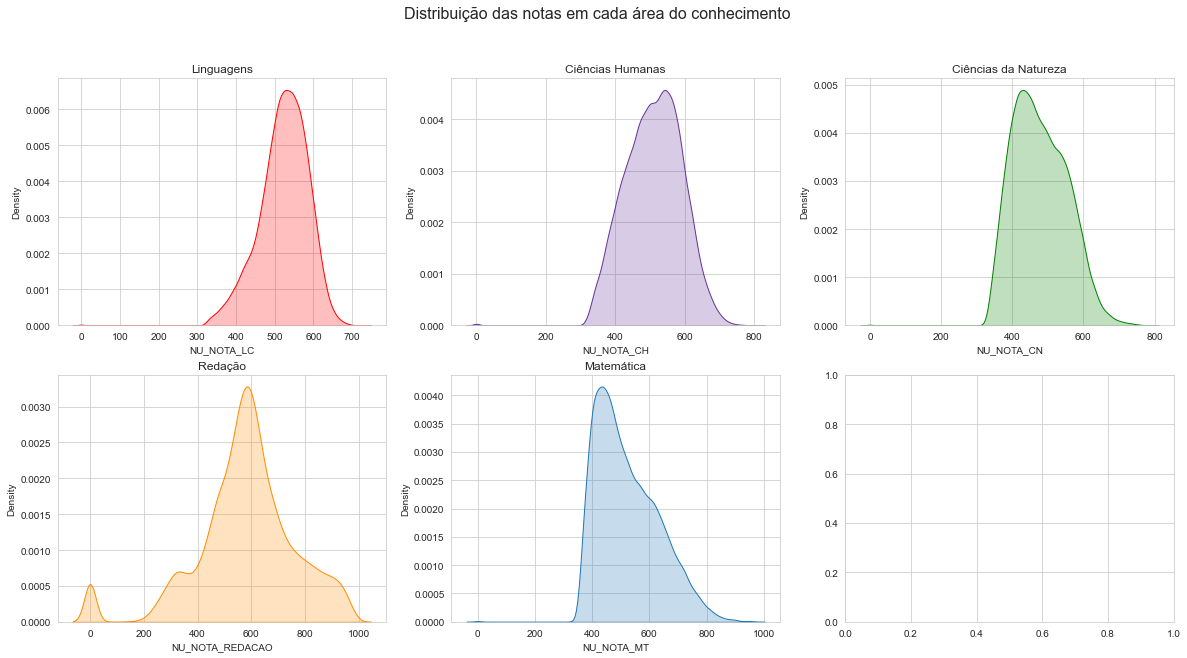

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(df_dataviz['NU_NOTA_LC'], ax = axes[0, 0], shade=True, color='r')
sns.kdeplot(df_dataviz['NU_NOTA_CH'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(df_dataviz['NU_NOTA_CN'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(df_dataviz['NU_NOTA_REDACAO'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(df_dataviz['NU_NOTA_MT'], ax = axes[1, 1], shade=True)

fig.suptitle('Distribuição das notas em cada área do conhecimento', fontsize=16)
axes[0, 0].set_title('Linguagens')
axes[0, 1].set_title('Ciências Humanas')
axes[0, 2].set_title('Ciências da Natureza')
axes[1, 0].set_title('Redação')
axes[1, 1].set_title('Matemática')

plt.show()

**Essas distribuições fazem sentido?**

Sim. Aqui podemos perceber uma **assimetria negativa** de Languagens e Ciências Humanas, que são comumente reconhecidas por ter as **perguntas mais fáceis** e uma **assimetria positiva** de Ciências da Natureza e Matemática, que são comumente reconhecidas por tendo as **perguntas mais difíceis**.

No entanto, **algo parece errado**... Se não houvesse valores iguais a zero nas pontuações do teste objetivo, o Seaborn iria ** automaticamente ** traçar o gráfico com o eixo x começando de um valor diferente de zero, pelo visto temos aqui então alguns **outliers**. Um outilier é uma observação que apresenta um grande afastamento do resto da série, ou que é inconsistente. A existência de outliers implica tipicamente em perdas na interpretação dos resultados dos testes estatísticos aplicados às amostras.

Para liberar a consciência, vamos **remover esses valores** de nosso dataframe e traçar a distribuição novamente.

In [28]:
df_dataviz = df_dataviz[(df_dataviz['NU_NOTA_LC'] != 0) &
                        (df_dataviz['NU_NOTA_CH'] != 0) & 
                        (df_dataviz['NU_NOTA_CN'] != 0) &
                        (df_dataviz['NU_NOTA_MT'] != 0)]

In [29]:
subset = subset.reindex(df_dataviz.index)

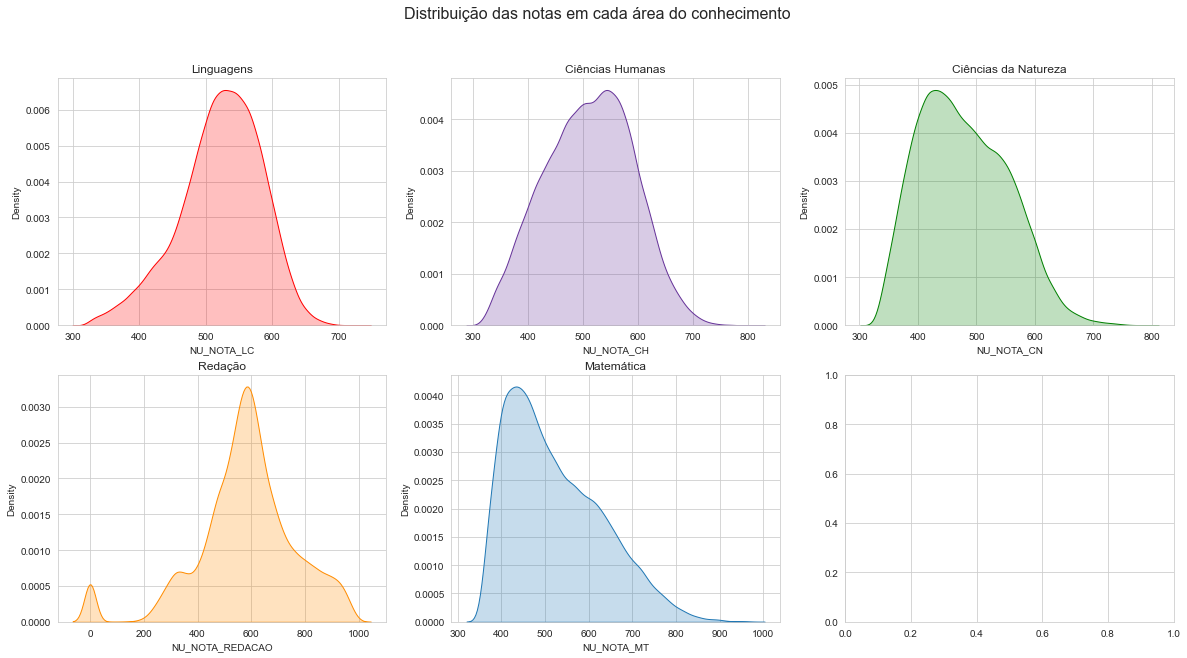

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(df_dataviz['NU_NOTA_LC'], ax = axes[0, 0], shade=True, color='r')
sns.kdeplot(df_dataviz['NU_NOTA_CH'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(df_dataviz['NU_NOTA_CN'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(df_dataviz['NU_NOTA_REDACAO'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(df_dataviz['NU_NOTA_MT'], ax = axes[1, 1], shade=True)

fig.suptitle('Distribuição das notas em cada área do conhecimento', fontsize=16)
axes[0, 0].set_title('Linguagens')
axes[0, 1].set_title('Ciências Humanas')
axes[0, 2].set_title('Ciências da Natureza')
axes[1, 0].set_title('Redação')
axes[1, 1].set_title('Matemática')

plt.show()

Agora tudo parece certo! Fica evidente a **presença efetiva da Teoria de Resposta ao Item (TRI) na correção das questões objetivas**, para as quais é impossível o aluno obter pontuação zero, mesmo que erre todas as questões. Na redação, essa limitação nao ocorre uma vez que sua correção é feita manualmente pelos professores.

Outra maneira interessante de visualizar esse efeito da TRI na pontuação é **analisar o intervalo de notas para cada número de respostas corretas.**

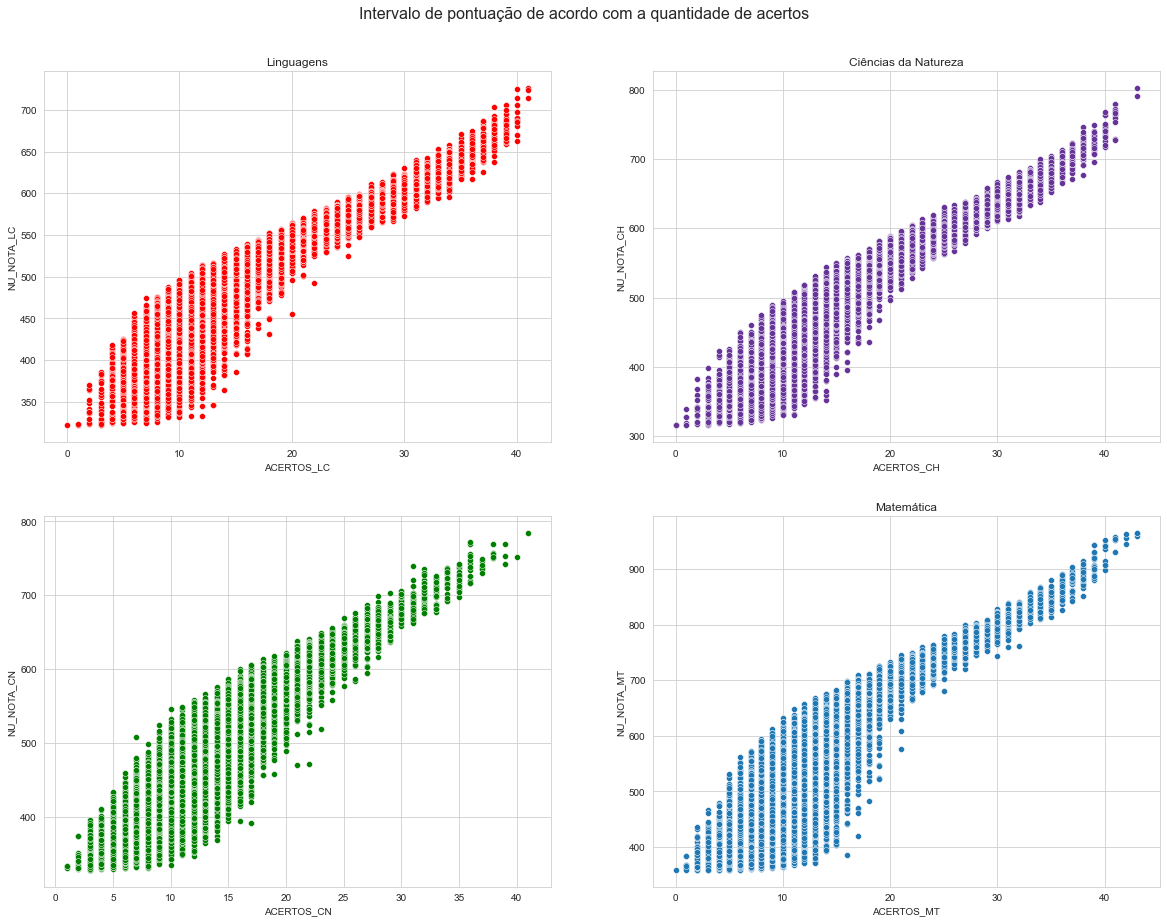

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.scatterplot(x=df_dataviz['ACERTOS_LC'], y=df_dataviz['NU_NOTA_LC'], ax=axes[0,0], color='r')
sns.scatterplot(x=df_dataviz['ACERTOS_CH'], y=df_dataviz['NU_NOTA_CH'], ax=axes[0,1], color='rebeccapurple')
sns.scatterplot(x=df_dataviz['ACERTOS_CN'], y=df_dataviz['NU_NOTA_CN'], ax=axes[1,0], color='g')
sns.scatterplot(x=df_dataviz['ACERTOS_MT'], y=df_dataviz['NU_NOTA_MT'], ax=axes[1,1])

fig.suptitle('Intervalo de pontuação de acordo com a quantidade de acertos', fontsize=16, y = 0.94)
axes[0, 0].set_title('Linguagens')
axes[0, 1].set_title('Ciências Humanas')
axes[0, 1].set_title('Ciências da Natureza')
axes[1, 1].set_title('Matemática')

plt.show()

Como podemos ver, existem **várias possibilidades de pontuação diferentes para pessoas com a mesma quantidade de correção**. Em matemática, por exemplo, existem pessoas com 10 acertos que pontuam perto de 380 e pessoas com 10 acertos que pontuaram acima de 600. Além disso, é interessante observar como esse **gap** entre as notas mínimas e máximas aumenta rapidamente no início, mas **tende a diminuir conforme a quantidade de respostas certas aumenta**.

Um **recorte** que gosto particularmente de fazer ao trabalhar nesses casos é comparar as características do **topo da pirâmide** (aqui, o 1% do topo) com o **resto** (os outros 99%). Então, aqui vamos **ordenar** o dataframe a partir da  NOTA_GERAL e **criar uma nova coluna** para que possamos usá-la para selecionar cada um desses grupos individualmente.

In [32]:
df_dataviz.sort_values(by=['NOTA_GERAL'], ascending=False, inplace=True)

In [33]:
df_dataviz['RANKING'] = df_dataviz.reset_index().index.to_numpy() < 1000
df_dataviz['RANKING'].replace({True:  '1%',
                               False: '99%'}, inplace=True)
df_dataviz.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ,NOTA_GERAL,RANKING
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190005179480,2019,2304400,Fortaleza,23,CE,31,Feminino,2,Não declarada,1,2304400.0,Fortaleza,23.0,CE,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,1,1,1,1,505.0,508.0,512.0,518.0,772.5,712.2,674.3,941.5,DADCCEBBCCCCBACBBEAACCCBDDDAEBCABCEAEADEADAAE,CBADADABCEEEBEBBECDEEDBBEADBBACDBBABCCCADCCAC,BBEDA99999CCABAECBBCCAACCEDBBCCDEEAAADDDECDECA...,DBABADCBCDBABECEEEACBDCCEDCDABEDAADDBECACAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,180.0,200.0,200.0,200.0,200.0,980.0,Medio completo,Medio completo,D,F,2,A,A,C,D,A,A,B,B,B,A,A,A,A,B,A,A,C,A,C,B,36,37,38,40,3100.5,816.10,1%
190003477183,2019,3131307,Ipatinga,31,MG,20,Masculino,1,Parda,1,3131307.0,Ipatinga,31.0,MG,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3131307,Ipatinga,31,MG,1,1,1,1,505.0,509.0,514.0,518.0,756.4,749.6,664.2,964.5,DADCCEDBCCACAAECEEBACBCBDDDADBCBBCEAEBDEADDAE,ACACEEBCCBABADBBBACDBBAACCCADCEABDCBEDDBBEACB,EBBAD99999BACECCEDEDAADDDBBCDECDDBADBCDACECBCC...,DBEBACCBCDBABECEEEDCBDCCEDCDABEDAADDDEDACAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,180.0,200.0,180.0,200.0,180.0,940.0,Medio completo,Medio completo,D,D,3,G,A,C,C,B,A,B,B,B,B,B,A,B,B,B,B,D,A,C,B,38,40,37,43,3134.7,814.94,1%
190004787887,2019,3537305,Penápolis,35,SP,26,Masculino,1,Branca,1,3537305.0,Penápolis,35.0,SP,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Feito isso, agora podemos criar uma função que plote de forma elegante essas informações que queremos visualizar e também podemos definir uma paleta de cores personalizada para usar a partir de agora.

In [34]:
def compare_distribution(df, column, chart_title, legend_title):
    fig, ax = plt.subplots(figsize=(15, 3)) 
    
    
    sns.histplot(df, y="RANKING", hue=column, stat="probability", multiple="fill", 
                 shrink=0.8, ax=ax, edgecolor="none")
    
    sns.despine(left=True, bottom=True)
    
    ax.set_title(chart_title) 
    ax.set_ylabel('') 
    ax.set_xlabel('Distribuição')

    legends = [x._text for x in list(ax.get_legend().get_texts())]
    legends.reverse()
    plt.legend(legends, title=legend_title,bbox_to_anchor=(0.5,-0.2), loc='upper center', ncol=3)
    plt.show()

In [35]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#f5c740", '#ef5777']
sns.set_palette(flatui)

Uma primeira comparação que pode ser feita é ver **como a distribuição de gênero varia entre esses dois grupos**.

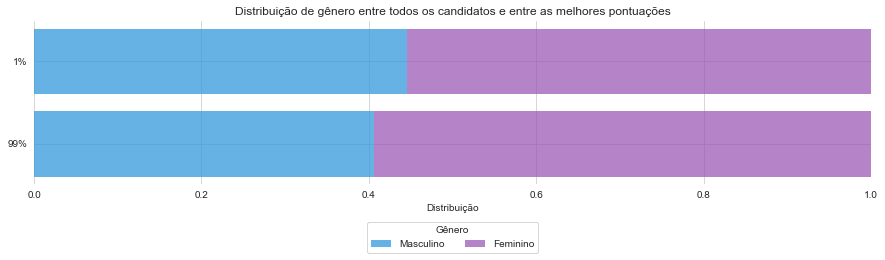

In [36]:
compare_distribution(df_dataviz, 'TP_SEXO', 
                     'Distribuição de gênero entre todos os candidatos e entre as melhores pontuações', 
                     'Gênero')

Vemos então que o **gênero masculino tem maior presença entre o top 1% das melhores notas** quando comparado ao restante da pirâmide.

---

Agora vamos fazer um **recorte racial** e ver como se comporta a distribuição das raças nessas parcelas.

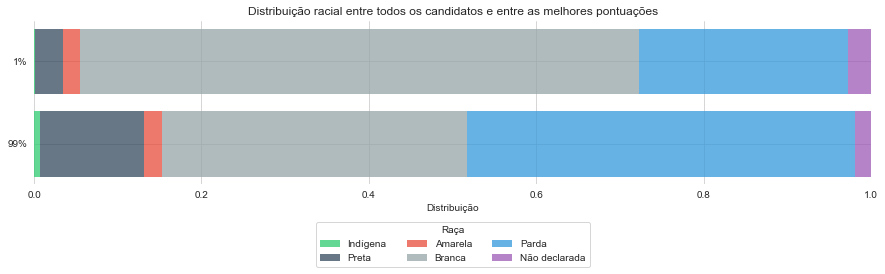

In [37]:
compare_distribution(df_dataviz, 'TP_COR_RACA', 
                     'Distribuição racial entre todos os candidatos e entre as melhores pontuações', 
                     'Raça')

Com este gráfico, dois pontos se destacam:

* A **população negra, parda, indígena está sub-representada** quando analisamos as melhores notas obtidas.
* Em contraste, a **população branca ganha notoriedade nesta mesma análise** das melhores pontuações.

---

Por fim, veremos **como o nível de escolaridade dos pais pode impactar essas distribuições**.

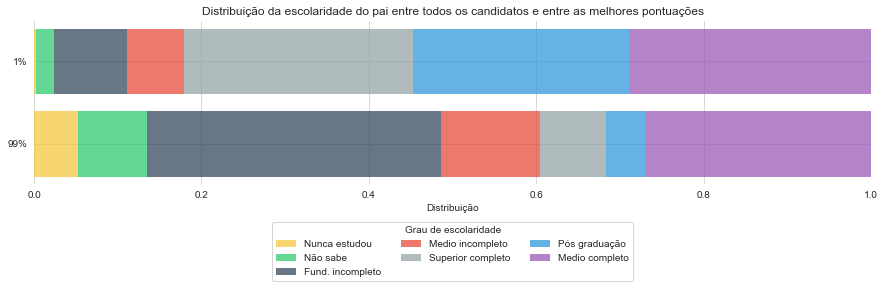

In [38]:
compare_distribution(df_dataviz, 'Q001', 
                     "Distribuição da escolaridade do pai entre todos os candidatos e entre as melhores pontuações", 
                     'Grau de escolaridade')

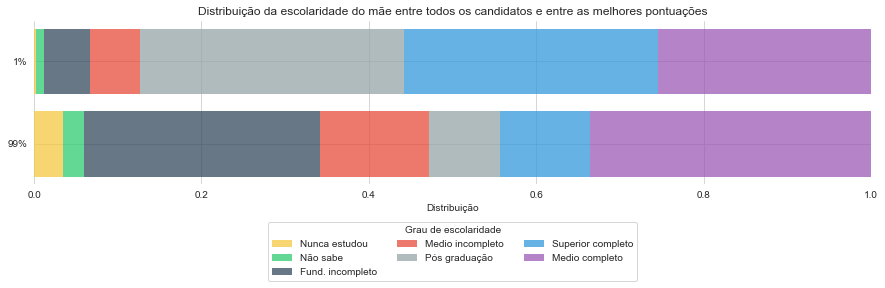

In [40]:
compare_distribution(df_dataviz, 'Q002', 
                     "Distribuição da escolaridade do mãe entre todos os candidatos e entre as melhores pontuações", 
                     'Grau de escolaridade')

Ressalta-se que candidatos cujo pai ou mãe possuem **ensino superior** ou **pós-graduação** ocupam de forma mais ampla o grupo das melhores notas quando comparada à parcela das demais notas.

---

Você deve se lembrar quando na fase de preparação dos dados criamos um conjunto de dados especial com a finalidade de plotar o mapa do Brasil no futuro, certo? Bem, chegou a hora! Vamos ver a média das pontuações de cada estado do país.

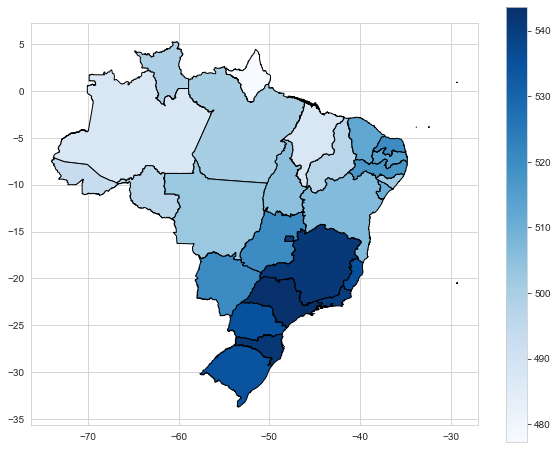

In [41]:
BRAZIL.plot(column = 'NOTA_GERAL',
            cmap='Blues',
            figsize=(10, 8),
            legend=True,
            edgecolor='black')
plt.show()

As regiões **sudeste** e **sul** apresentam as maiores médias, enquanto a região **norte** apresenta o pior desempenho.

## Testes de Hipótese

Quando queremos fazer algumas perguntas e **interpretar os dados** de forma mais objetiva, usamos métodos estatísticos que fornecem **confiança** ou **probabilidade** sobre as respostas. Para fazer isso, usamos testes de hipótese.

Um teste de hipótese avalia **duas afirmações mutuamente exclusivas** sobre uma população para determinar **qual afirmação é mais bem suportada pelos dados de amostra.**

Esses testes giram em torno de dois tipos de hipóteses:

- **Hipótese nula (H0)**: A suposição do teste é válida e não foi rejeitada em algum nível de significância.
- **Hipótese alternativa 1 (H1)**: A suposição do teste não é válida e é rejeitada em algum nível de significância.

Existem vários testes de hipóteses, muitos tópicos, diferentes formas de interpretação e, para não tornar este kernel muito massivo, recomendo novamente que, se você quiser se aprofundar, dê uma olhada nos materiais complementares no final da página . Aqui, vou apresentar apenas alguns conceitos que serão importantes para entender o que estamos fazendo aqui, ok?

Em primeiro lugar, **um teste de hipótese retorna um valor que chamamos de p ou valor p**. Com esse valor, podemos **interpretar ou quantificar o resultado do teste** e, assim, rejeitar ou deixar de rejeitar uma hipótese nula.

Essa decisão de rejeitar ou não é feita com base no **nível de significância**, comumente identificado por alfa. **Um valor comum usado para alfa é 5% ou 0,05 e iclusive é o que vamos usar aqui neste kernel**. Este valor é geralmente um valor acordado para cada tipo de análise (por exemplo, na área da saúde, o valor é geralmente 0,01), então **não é certo alterar o nível de significância** para manipular o resultado do teste, isso é chamado **p-hacking**.

Quando o valor p é menor ou igual ao alfa, **rejeitamos a hipótese nula**, caso contrário, **falhamos em rejeitar a hipótese nula**. É importante lembrar que embora seja comum, é **incorreto** dizer que "aceitamos a hipótese nula". Na verdade, simplesmente não o rejeitamos por **falta de evidências**.

Existem duas classificações de testes estáticos: **teste unicaudal** e **teste bi-caudal**. Os testes unicaudais têm na hipótese nula alguma premissa do tipo **x é maior / menor que y**, enquanto nos testes bicaudais são premissas do tipo **x é igual / diferente de y**.

* Exemplo de hipótese de um teste unicaudal: as média das alturas dos homens é MAIOR que a média das alturas das mulheres. 
* Exemplo de hipótese de um teste bi-caudal: as médias das alturas dos homens é DIFERENTE que a média das alturas das mulheres.
![](http://www.fao.org/3/X6831E/X6831E120.gif)

Vamos agora entender um pouco dessa representação gráfica acima. Bem, basicamente a curva representa alguma **distribuição em H0** (ex: em testes de normalidade, usamos a distribuição Gaussiana) e, a partir de uma **fórmula que varia para cada teste**, encontramos um valor em x- eixo que vai **delimitar uma área sob esta curva que significa o nível de significância**. Quando estamos falando de um **teste de normalidade**, esse valor no eixo xe o **z-score** e é calculado por uma fórmula, enquanto no **teste t** esse valor é calculado de outra fórmula e o valor é denominado **estatística t**. Também podemos ver neste gráfico se o **valor-p** (que também é representado por uma área abaixo da curva nesse gráfico) é menor que o alfa.

![](https://i.imgur.com/1fN9jmS.png)

---

Após essa introdução, vamos colocar em prática e o primeiro teste que podemos realizar é um **teste de normalidade**, ou seja, verificaremos se **nossa distribuição é gaussiana ou não**. Uma distribuição gaussiana é uma das distribuições contínuas mais importantes e é definida por:

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right], \quad x\in(-\infty,\infty).$$

Um dos fatores que tornam essa distribuição tão especial é o fato de **vários fenômenos em nossa realidade** terem um comportamento semelhante a este, entre eles podemos citar a **altura** das pessoas. Veja a imagem abaixo que compara a curva gaussiana padrão com o histograma de altura.

![](https://i.imgur.com/imHoTTf.png)

Um dos testes que podemos usar para avaliar a normalidade de uma distribuição é o **teste de Shapiro-Wilk**. Este teste avalia a **hipótese nula** de que uma amostra tem a mesma distribuição que a distribuição gaussiana. Portanto, vamos definir uma função simples que usa a função shapiro() do scipy e ver os resultados.

In [42]:
def is_normal(sequence, variable, alpha= 0.01):
    _, pvalue = sct.shapiro(df_dataviz['NU_NOTA_LC'])
    if pvalue > alpha:
        print(f'É provável que {variable} seja normalmente distribuido.')
    else:
        print(f'É improvável que {variable} seja normalmente distribuido.')

In [43]:
is_normal(df_dataviz['NU_NOTA_LC'], 'NU_NOTA_LC')
is_normal(df_dataviz['NU_NOTA_CH'], 'NU_NOTA_CH')
is_normal(df_dataviz['NU_NOTA_CN'], 'NU_NOTA_CN')
is_normal(df_dataviz['NU_NOTA_MT'], 'NU_NOTA_MT')
is_normal(df_dataviz['NU_NOTA_REDACAO'], 'NU_NOTA_REDACAO')

É improvável que NU_NOTA_LC seja normalmente distribuido.
É improvável que NU_NOTA_CH seja normalmente distribuido.
É improvável que NU_NOTA_CN seja normalmente distribuido.
É improvável que NU_NOTA_MT seja normalmente distribuido.
É improvável que NU_NOTA_REDACAO seja normalmente distribuido.


Outra forma muito interessante de analisar a normalidade dos dados é por meio do **Q-Q plot**. O gráfico Q-Q é um gráfico que **compara duas distribuições de probabilidade**, colocando seus **quantis** em diferentes dois diferentes eixos. Para criá-lo rapidamente, podemos usar a função qqplot da biblioteca StatsModel.

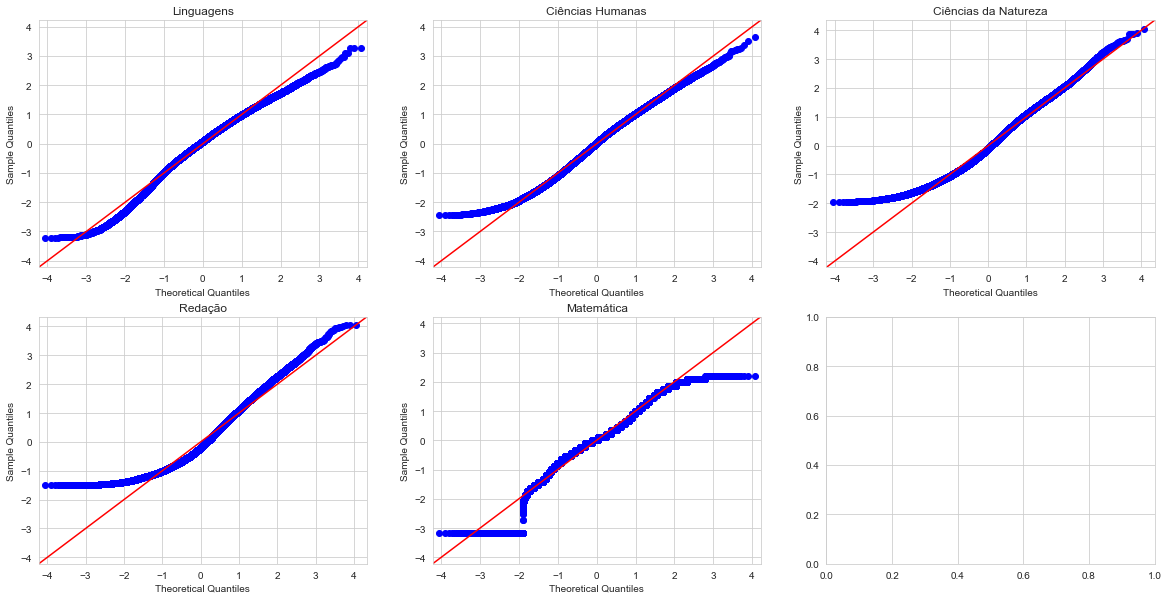

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sm.qqplot(df_dataviz['NU_NOTA_LC'], fit=True, line="45", ax=axes[0, 0]);
sm.qqplot(df_dataviz['NU_NOTA_CH'], fit=True, line="45", ax=axes[0, 1]);
sm.qqplot(df_dataviz['NU_NOTA_CN'], fit=True, line="45", ax=axes[0, 2]);
sm.qqplot(df_dataviz['NU_NOTA_MT'], fit=True, line="45", ax=axes[1, 0]);
sm.qqplot(df_dataviz['NU_NOTA_REDACAO'], fit=True, line="45", ax=axes[1, 1]);

axes[0, 0].set_title('Linguagens')
axes[0, 1].set_title('Ciências Humanas')
axes[0, 2].set_title('Ciências da Natureza')
axes[1, 0].set_title('Redação')
axes[1, 1].set_title('Matemática')

plt.show()

Estes gráficos podem parecer confusos à primeira vista, mas garanto que é simples de entender, venha comigo! Bem, **no eixo X temos os quantis teóricos de uma distribuição Gaussiana** e **no eixo Y os quantis de nossa amostra**. Se os valores fossem iguais nos dois eixos, teríamos uma função do tipo **y = x** e, portanto, o gráfico seria uma **linha inclinada de 45º**, como as vermelhas que ali estão.

Dessa forma, como neste exemplo vemos claramente que **não há um bom ajuste dos pontos a esta linha**, podemos dizer que nossa curva apresenta **um padrão diferente da curva gaussiana**.

Outro teste estatístico que podemos fazer é o **teste t**, que será usado aqui para determinar se **as médias de dois conjuntos de dados são significativamente diferentes entre si**. Aplicando esse teste em nossa amostra, podemos concluir o comportamento dessas médias para nossa população.

O teste t tem a seguinte estrutura de hipótese:

* H0: Assume que **não existe diferença** entre as médias das duas distribuições.
* H1: Assume que **existe alguma diferença** entre as médias das duas distribuições.

Um **equívoco comum** quando se trata do teste t é pensar que ele **é aplicado apenas a distribuições normais**. Mas não! **O teste t não assume a normalidade da amostra, apenas assume que as médias das diferentes amostras que podemos criar estão normalmente distribuídas**.

Imagine uma grande população da qual você poderia tirar várias amostras. Pelo **teorema do limite central**, as médias das médias desta população com variância finita estão **próximas de uma distribuição normal**, independentemente da distribuição da população.

Simplificando, dizemos que o teste t é **inválido para pequenas amostras de distribuições não normais** (normalmente n <30, onde sim, geralmente trabalhamos apenas com populações de distribuição normal), mas é **válido para grandes amostras de distribuições não normais**.

Dado isso e como fizemos anteriormente, vamos definir uma função simples que usa a **função ttest_ind  do Scipy**.

In [45]:
def hypothesis_testing(x, y, alpha=0.05):
    stat, p = sct.ttest_ind(x, y)
    
    if p > alpha:
        print("Não podemos rejeitar a hipótese nula. Em outras palavras, não há nenhuma diferença entre as médias dessas distribuições.")
    else:
        print("Podemos rejeitar a hipótese nula. Em outras palavras, há alguma diferença entre as médias dessas distribuições.")

**As médias da pontuação geral são iguais ao comparar candidatos de 18 anos a candidatos de 17?**

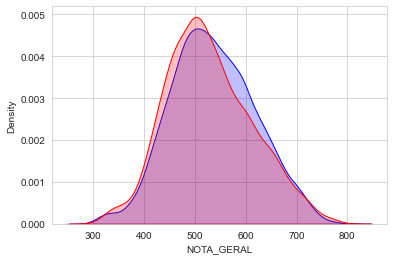

In [46]:
sns.kdeplot(data=df_dataviz.query("NU_IDADE == 17"), x='NOTA_GERAL', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("NU_IDADE == 18"), x='NOTA_GERAL', color='r', shade=True)
plt.show()

In [47]:
hypothesis_testing(df_dataviz.query("NU_IDADE == 19")['NU_NOTA_REDACAO'],
                   df_dataviz.query("NU_IDADE == 18")['NU_NOTA_REDACAO'])

Podemos rejeitar a hipótese nula. Em outras palavras, há alguma diferença entre as médias dessas distribuições.


**As médias de pontuação da redação são iguais ao comparar candidatos do sexo masculino com candidatos do sexo feminino?**

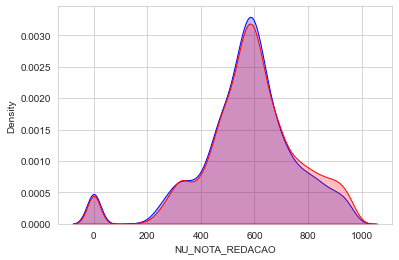

In [50]:
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Masculino'"), x='NU_NOTA_REDACAO', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Feminino'"), x='NU_NOTA_REDACAO', color='r', shade=True)
plt.show()

In [51]:
hypothesis_testing(df_dataviz.query("TP_SEXO == 'Masculino'")['NU_NOTA_REDACAO'],
                   df_dataviz.query("TP_SEXO == 'Feminino'")['NU_NOTA_REDACAO'])

Podemos rejeitar a hipótese nula. Em outras palavras, há alguma diferença entre as médias dessas distribuições.


**As médias das notas em matemática são iguais ao comparar candidatos do sexo masculino com candidatos do sexo feminino?**

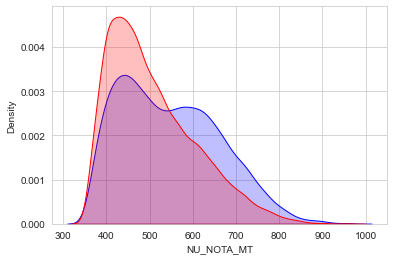

In [52]:
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Masculino'"), x='NU_NOTA_MT', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Feminino'"), x='NU_NOTA_MT', color='r', shade=True)
plt.show()

In [53]:
hypothesis_testing(df_dataviz.query("TP_SEXO == 'Masculino'")['NU_NOTA_MT'],
                   df_dataviz.query("TP_SEXO == 'Feminino'")['NU_NOTA_MT'])

Podemos rejeitar a hipótese nula. Em outras palavras, há alguma diferença entre as médias dessas distribuições.


**As médias da pontuação geral são diferentes ao comparar candidatos brancos com candidatos negros?**

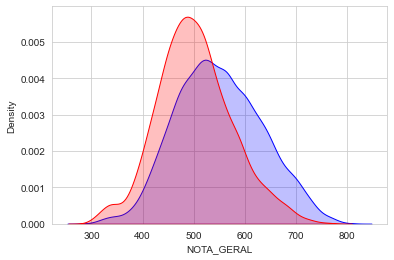

In [54]:
sns.kdeplot(data=df_dataviz.query("TP_COR_RACA == 'Branca'"), x='NOTA_GERAL', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("TP_COR_RACA == 'Preta'"), x='NOTA_GERAL', color='r', shade=True)
plt.show()

In [55]:
hypothesis_testing(df_dataviz.query("TP_COR_RACA == 'Branca'")['NOTA_GERAL'],
                   df_dataviz.query("TP_COR_RACA == 'Preta'")['NOTA_GERAL'])

Podemos rejeitar a hipótese nula. Em outras palavras, há alguma diferença entre as médias dessas distribuições.


## Machine Learning (Modelagem e Avaliação)

Chegamos agora ao estágio de modelagem: é onde definiremos qual modelo será usado em nossa aplicação. Existem várias abordagens a serem tomadas aqui, desde as mais simples com um modelo de regressão linear até soluções que alcançam o estado da arte no campo do aprendizado de máquina.

Caso você tenha notado, no início do notebook importamos um módulo chamado **PyCaret**. Vamos usá-lo para facilitar esse processo de treinamento e teste entre diferentes tipos de algoritmos.

**PyCaret é uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que permite ir desde a preparação dos dados até a implantação do modelo em minutos, na escolha do ambiente de notebook.**

A biblioteca em questão traz a **abordagem AutoML**, que é o processo de **automatizar o processo de aplicação do aprendizado de máquina a problemas do mundo real**. O AutoML cobre o **pipeline completo** do conjunto de dados bruto ao modelo de aprendizado de máquina. O AutoML foi proposto como uma solução baseada em inteligência artificial para o desafio cada vez maior de aplicar o aprendizado de máquina.

A principal vantagem de usar essa abordagem aqui é que **PyCaret pode treinar e testar 20 tipos diferentes de modelos de regressão**. Como a função a ser mapeada que relaciona o conjunto de dados à variável a ser estimada possui complexidade relativamente baixa, é muito provável que um desses modelos tenha um desempenho muito bom em nosso caso.

Após esta breve explicação, vamos **inicializar o ambiente do pycaret**.

In [54]:
caret_df = setup(data = subset, 
                 target = 'SOMA_NOTAS_OBJ', 
                 session_id = 777)

,Description,Value
0,session_id,777
1,Target,SOMA_NOTAS_OBJ
2,Original Data,"(40970, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(28678, 4)"


Agora, podemos apenas chamar a função **compare_models()** e esperar a mágica acontecer.

In [55]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,48.3943,3860.7365,62.1234,0.9508,0.0325,0.0249,3.7510
lightgbm,Light Gradient Boosting Machine,49.0257,3945.6119,62.8023,0.9498,0.0328,0.0251,0.0470
gbr,Gradient Boosting Regressor,49.5940,4024.9429,63.4338,0.9488,0.0330,0.0254,0.1580
xgboost,Extreme Gradient Boosting,49.8958,4089.9522,63.9398,0.9479,0.0334,0.0256,0.5170
knn,K Neighbors Regressor,53.2468,4667.8732,68.3107,0.9406,0.0356,0.0273,0.0240
rf,Random Forest Regressor,54.6065,4922.9215,70.1528,0.9373,0.0367,0.0280,0.3690
en,Elastic Net,56.6703,4971.2333,70.5000,0.9367,0.0359,0.0286,0.0070
huber,Huber Regressor,56.5832,4974.3815,70.5215,0.9367,0.0358,0.0285,0.0440
br,Bayesian Ridge,56.6234,4968.9540,70.4836,0.9367,0.0359,0.0285,0.0100
ridge,Ridge Regression,56.6234,4968.9539,70.4836,0.9367,0.0359,0.0285,0.0110


Como podemos ver, o **CatBoost Regressor obteve o melhor desempenho** entre os demais. Antes de dar o próximo passo, é importante **entender como o CatBoost realmente funciona**. Então, vamos dar uma olhada:

Como o nome sugere, CatBoost é uma biblioteca de **Gradient Boosting** de código aberto em árvores de decisão, que ganhou muita notoriedade porque permite obter ótimos resultados mesmo com **variáveis categóricas** no conjunto de dados. Aqui no nosso caso todas as variáveis são contínuas, mas mesmo assim conseguimos tirar vantagem da parte de Boostomg que constitui o nome do modelo e por isso os resultados alcançados foram tão bons.

Antes de saber como o Gradient Boosting realmente funciona, **vamos entender sobre as árvores de decisão e como podemos usá-las em tarefas de regressão.**

**O aprendizado da árvore de decisões é uma das abordagens de modelagem preditiva** usada em estatística, mineração de dados e aprendizado de máquina. Ele usa uma árvore de decisão como um modelo preditivo para **ir das observações sobre um item às conclusões sobre o valor-alvo do item**. Esta abordagem pode ser usada em **classificação** (árvore de classificação) e em **tarefas de regressão** (árvore de regressão).

A **estrutura de uma árvore** pode ser descrita usando alguns conceitos principais:

* **Raiz**: o nó mais alto da árvore;
* **Aresta**: a ligação entre dois nós;
* **Folha**: um nó sem nós filhos na árvore;
* **Pai**: um nó com uma aresta para um nó filho;
* **Subárvore**: um recorte da árvore original.
* **Altura**: o comprimento do caminho mais longo até a folha.

![](https://i.imgur.com/2OwRum2.png)
  
Não vou me aprofundar muito nos conceitos matemáticos da implementação de um algoritmo de aprendizagem de árvore de decisão, mas **pense que, usando algumas regras e equações matemáticas, podemos calcular automaticamente alguns limiares e usá-los como nós de uma árvore**. Ao final, nas folhas, temos diferentes valores que serão as possibilidades de predição de nossa árvore. Verifique o seguinte exemplo de uma árvore de regressão:

![](https://i.imgur.com/NkbuTuX.png)

Diante do exposto, é fácil aplicar a técnica de impulso. Basicamente, o que fazemos é **construir árvores uma de cada vez, onde cada nova árvore ajuda a corrigir erros cometidos por árvores previamente treinadas**. Uma vez que as árvores de impulso são derivadas da otimização do espaço de funções, elas podem basicamente ser usadas para **mapear quase todas as funções objetivas**.

![](https://i.imgur.com/lz3doHx.png)

Bem, acho que isso é o suficiente para uma primeira olhada. Claro, CatBoost tem várias outras coisas que podem ser abordadas aqui, como a metodologia diferente que eles usam para **evitar o overfitting** do modelo ou falar mais profundamente sobre os **parâmetros** existentes neste algoritmo, etc. Se você quiser se aprofundar neste campo de estudo, recomendo dar uma olhada no final do caderno na seção de **referências e conteúdos complementares**.

Agora, para tentar **atingir um nível de desempenho ainda melhor**, vamos **tunar** o modelo.

In [56]:
cat_reg = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.1886,3795.9714,61.6115,0.9531,0.0322,0.0247
1,48.8584,3959.0454,62.9209,0.9496,0.0328,0.0251
2,47.1492,3694.4025,60.7816,0.9525,0.0318,0.0242
3,48.2288,3877.0834,62.2662,0.9503,0.0327,0.0248
4,48.2126,3836.1459,61.9366,0.9502,0.0325,0.0249
5,46.7987,3577.4620,59.8119,0.9535,0.0312,0.0240
6,48.5935,3856.9366,62.1042,0.9505,0.0325,0.0250
7,49.2985,4018.6043,63.3925,0.9506,0.0332,0.0253
8,50.0326,4127.1369,64.2428,0.9485,0.0337,0.0257
9,48.5824,3864.5771,62.1657,0.9497,0.0325,0.0249


In [57]:
tuned_cat = tune_model(cat_reg)
print(tuned_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.4777,3819.6093,61.8030,0.9528,0.0322,0.0248
1,48.7515,3922.3355,62.6286,0.9500,0.0326,0.0250
2,47.0555,3675.4697,60.6257,0.9528,0.0317,0.0242
3,48.2555,3859.3527,62.1237,0.9505,0.0325,0.0248
4,48.2452,3824.1986,61.8401,0.9504,0.0324,0.0249
5,46.8423,3585.7681,59.8813,0.9534,0.0312,0.0240
6,48.7808,3878.7334,62.2795,0.9502,0.0325,0.0250
7,49.3278,3995.5125,63.2101,0.9509,0.0330,0.0253
8,50.0897,4092.7097,63.9743,0.9489,0.0335,0.0257
9,48.4663,3806.3945,61.6960,0.9504,0.0322,0.0248


Dado este modelo melhorado, uma boa coisa a fazer é **entender um pouco mais sobre essas métricas** relatadas pelo PyCaret para regressão. Abaixo você encontrará uma explicação matemática deles:

**MAE (erro médio absoluto):**

Em estatística, o erro médio absoluto (MAE) é uma medida de **erros entre observações pareadas que expressam o mesmo fenômeno**. Exemplos de Y versus X incluem comparações de predito versus observado, tempo subsequente versus tempo inicial e uma técnica de medição versus uma técnica alternativa de medição. MAE é calculado como:

$$
\begin{align}
\text{MAE} = \frac{1}{n} \sum_{i=1}^n | y_i - \hat y_i | 
\end{align}
$$

A principal vantagem de usar o MAE sobre as outras métricas é porque é muito mais fácil de explicar.

**MSE (erro quadrático médio):**

Em estatística, o erro quadrático médio (MSE) mede a **média dos quadrados dos erros** - ou seja, a diferença quadrática média entre os valores estimados e o valor real. MSE é uma função de risco, correspondendo ao valor esperado da perda de erro quadrática. MSE é calculado como:

$$
\begin{align}
\text{MSE} = \frac{1}{n} \sum_{i=1}^n ( y_i - \hat y_i )^2 
\end{align}
$$

Existem algumas vantagens em usar o MSE como métrica: a mais simples é porque **MSE é mais fácil de derivar** quando comparamos com o MAE - facilitando a implementação como função perda no algoritmo de otimização. Outra coisa legal é que o MSE incorpora tanto a **variância** do estimador (quão amplamente distribuídas as estimativas são de uma amostra de dados para outra) e seu **viés** (quão longe o valor médio estimado está do valor real). Portanto, também podemos escrever $\text{MSE}(\hat \theta) = E_\theta \text{Var}_\theta (\hat \theta) + \text{Bias}(\hat \theta, \theta)^2 $.

**RMSE (raiz do erro quadrático médio):**

A raiz do erro quadrático médio (RMSE) é uma medida freqüentemente usada das diferenças entre os valores previstos por um modelo ou um estimador e os valores observados. O RMSE representa a **raiz quadrada do segundo momento amostral das diferenças entre os valores previstos e os valores observados** ou a média quadrática dessas diferenças. Esses desvios são chamados de **resíduos** quando os cálculos são realizados sobre a amostra de dados que foi usada para estimativa e são chamados de erros (ou erros de previsão) quando calculados fora da amostra.

$$
\begin{align}
\text{RMSE} =  \sqrt{\sum_{i=1}^{n}{\frac{( y_i - \hat y_i )^2}{n}}}
\end{align}
$$

Um dos prós de usar o RMSE como uma métrica de avaliação é que, uma vez que os erros são elevados ao quadrado antes de serem calculados, o RMSE atribui um peso relativamente alto aos **erros grandes**. Então, se você quer que seu modelo penalize esses grandes erros, você pode usar essa métrica como uma função de custo.

** R2 (R-quadrado): **

Em estatística, R2 (também chamado de R-quadrado e coeficiente de determinação) é a **proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s)**. Costumo encontrar pessoas que têm alguns conceitos errados sobre o R2 e, por causa disso, tomarei cuidado com esta explicação. O R2 pode ser definido como:
$$
\begin{align}
\text{R}^2 = 1- \frac{SS_{res}}{SS_{tot}} 
\end{align}
$$

* Nessa fórmula $SS_{tot} = \sum_i (y_i - \bar y_i)^2$ e significa o soma total dos quadrados. 
* Por sua vez, $SS_{res} = \sum_i(y_i - \hat h_i)^2$ e significa a soma dos quadrados dos resíduos. 

Preste atenção que no primeiro subtraímos a **média dos dados observados** ($ \bar y_i $) e no segundo subtraímos o **valor previsto** pelo nosso estimador ($\hat y_i$).

Agora focando nos principais equívocos em minha opinião:
1. **"R2 indica que há uma relação causal entre as variáveis independentes e a variável de destino."**
    
     Esta afirmação é falsa por um motivo simples: R-quadrado é uma medida de correlação. Lembre-se sempre de que CORRELAÇÃO NÃO É CAUSALIDADE.
    
    
2. **"R2 é muito grande, então o modelo de regressão escolhido é bom."**
    
     Aqui está outro mito, o coeficiente de determinação é calculado a partir dos dados da amostra (que são usados para gerar o modelo), então não faz sentido considerá-lo como uma métrica para validação do modelo. Se você quiser algo nesse sentido que use R2, você pode trabalhar junto com a tabela ANOVA, ela o ajudará a estabelecer essa relação desejada.


O RMLSE e o MAPE são boas métricas para avaliação, mas não são comumente usados. Portanto, para não entrar desnecessariamente nelas, optarei por não detalhar como funcionam.

Outra maneira legal de avaliar o desempenho do modelo é usando o **gráfico residual**. Resíduos, no contexto de modelos de regressão, são a **diferença entre o valor observado da variável target (y) e o vaor previsto (ŷ)**, ou seja, o erro da previsão. O gráfico de resíduos mostra a diferença entre os resíduos no eixo vertical e a variável dependente no eixo horizontal, permitindo que você **detecte regiões dentro do target que podem ser suscetíveis a mais ou menos erros**.

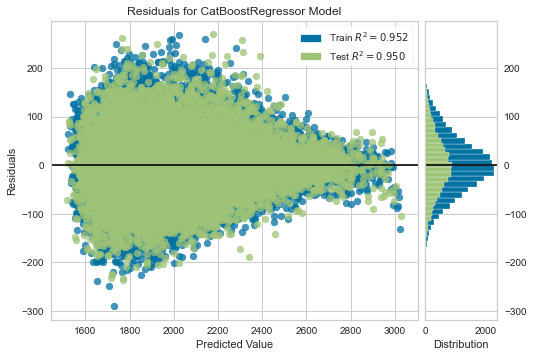

In [58]:
plot_model(tuned_cat, plot = 'residuals')

Na imagem anterior, podemos ver que temos um comportamento semelhante no conjunto de treinamento e no conjunto de teste: **baixa variância entre as pontuações altas que tende a aumentar à medida que a pontuação cai.**

Esse comportamento é **completamente normal neste caso** devido à Teoria de Resposta ao Índice, que pode penalizar ou valorizar a pontuação de um indivíduo pela questão da coerência das respostas, possibilitando que pessoas com o mesmo número de acertos tenham notas muito diferentes. Lembre-se do gráfico gerado anteriormente sobre as faixas de pontuação em relação ao número de respostas corretas em cada área de conhecimento.

## Interpretando o modelo

Sim, eu sei, as métricas e os gráficos anteriores são lindos, eles nos dizem muito sobre nosso modelo, etc. No entanto, esse tipo de informação é bom demais para ser usado internamente pela equipe de ciência de dados. **Para se comunicar com um gerente, ou com um público maior que simplesmente não tem conhecimento prévio sobre o assunto, dizermos que nosso modelo tem RMSE = 62,5 e R-2 = 0,95 não agrega muito valor e não explica muito sobre o que realmente acontece.**

Para contornar esses problemas, há um grande esforço na construção de técnicas que facilitem a explicabilidade dos resultados. Um deles é **SHAP(Shapley Additive ExPlanations)**, é o que iremos abordar e usar aqui.

SHAP é uma **abordagem vinda do campo da Teoria dos Jogos** para explicar a saída de qualquer modelo de aprendizado de máquina. Ele conecta a alocação de crédito ideal com explicações locais usando os **valores clássicos de Shapley** da teoria dos jogos e suas extensões relacionadas.

Para dar uma olhada breve e intuitiva nos valores Shapely da teoria dos jogos, vamos supor um cenário onde alguns amigos Wesley, Lucas, Matheus, Hael e Weybson queiram **alugar um apartamento** e para isso também terão para **pagar as despesas comuns** (internet, água, luz, etc.). No entanto, pensam que devido à **diferente forma e quantidade** com que utilizam estes serviços **não é justo que dividam a conta igualmente**.

Sendo assim, **qual é a maneira mais justa de separar a conta entre todos os amigos?** Para analisar isso, devemos considerar qual seria a tarifa de **cada subconjunto de amigos** (apenas Wesley, apenas Matheus e Weybson, todos juntos, etc) e observar a **contribuição marginal** para o custo quando cada amigo se junta a cada subconjunto possível. Aqui, de acordo com Shapely, **a contribuição mais justa para cada amigo é sua contribuição marginal média sobre todos esses conjuntos.**

Agora, você pode estar se perguntando **"bem, mas como isso pode ser aplicado no Aprendizado de Máquina?"** É fácil: pense nas features como se fossem os amigos do exemplo anterior. Citando o [artigo original](https://arxiv.org/pdf/1705.07874.pdf), "Os valores SHAP atribuem a cada feature a **mudança na previsão esperada do modelo** quando condicionamos ele a aquela feature. Eles explicam **como saímos do valor base** $E[f (z)]$ que seria previsto se não conhecêssemos nenhum feature **para chegar no output final** $ f (x) $. "

Se criarmos um estimador para o exemplo supracitado, temos que analisar como, por exemplo, a contribuição de Matheus para o aluguel passou de um valor base (aqui  $ E[f(z)] = \text{R\$ 400}$) para o valor predito ($\text{R\$ 730}$).

![](https://i.imgur.com/iv3UuaD.png)

Usando SHAP, podemos ver o quanto cada recurso impactou no valor base:

![](https://i.imgur.com/0BeeSJv.png)

Perceba que este diagrama mostra uma **ordem única**. Entretanto, quando o modelo é não linear ou ou as features de entrada não são independentes, a ordem em que os recursos são adicionados à expectativa faz diferença e os valores de SHAP surgem da **média** dos valores φi em todas as ordenações possíveis.

Portanto, vamos plotar essa representação para um exemplo previsto por nosso modelo. Para fazer isso, podemos usar a função **interpret_model()** e passar ```plot = 'reason'``` como parâmetro.

In [72]:
interpret_model(tuned_cat, plot = 'reason', observation=777)

Como podemos ver, o número de acertos na prova de linguagens (ACERTOS_LC), na prova de ciências humanas (ACERTOS_CH) e na prova de ciências da natureza (ACERTOS_CN) foram responsáveis por **trazer o valor previsto acima do valor base** (que é aqui a média dos valores do conjunto de treinamento). Por outro lado, o número de acertos na prova de matemática (ACERTOS_MT) teve um **impacto negativo no resultado**.

Outra forma de visualizar os resultados do SHAP é com um gráfico que acho muito mais interessante. Aqui podemos ver em uma espécie de **aspecto macro** a **influência de cada recurso na saída do modelo**. Para traçar este gráfico, podemos chamar novamente a função interpret_model(), mas dessa vez **sem parâmetros**.

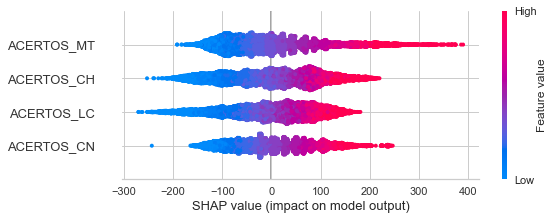

In [60]:
interpret_model(tuned_cat)

Além da análise primária de que quanto maior for o valor dos recursos de resposta correta, melhor será o impacto na saída do modelo, uma coisa muito mais importante que ilumina os olhos é o fato de **os testes de matemática e ciências naturais terem uma visão mais ampla faixa de impacto positivo do que os outros**. Essa percepção está diretamente ligada ao que tivemos na parte da análise exploratória dos dados sobre a amplitude das pontuações em cada área do conhecimento e mostra que, de fato, esse é um fator determinante para o alcance de boas pontuações. Ou seja, se você vai fazer o ENEM, sugiro um estudo mais firme nessas duas áreas :)

Agora, vamos **salvar o modelo** e nosso trabalho está finalmente concluído! Os próximos passos seriam usar todos os insights que obtivemos neste kernel para apresentar para o board da empresa e, com a devida aprovação, fazer o deploy do modelo online e auxiliar os alunos.

In [61]:
save_model(tuned_cat, 'model/enem_predictor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='SOMA_NOTAS_OBJ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SOMA_NOTAS_OBJ')),
                 ('fix_perfect', Remove_100(target='SOMA_NOTAS_OBJ')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', '

## Obrigado! 

E agora, de fato, chegamos ao fim. Aqui, conforme prometido no início do caderno, visitamos os conceitos importantes que são essenciais para o desenvolvimento de projetos de ciência de dados.

- ✅ **Entendimento do problema**
- ✅ **Amostragem**
- ✅ **Manipulação de dados** 
- ✅ **Visualização de dados**
- ✅ **Teste de hipóteses**
- ✅ **AutoML com PyCaret**                 
- ✅ **Algoritmo CatBoost**                    
- ✅ **Métricas de avaliação para regressão**   
- ✅ **Interpretabilidade com SHAP**

Claro, ainda poderíamos continuar a trabalhar neste projeto: plotar mais gráficos, trabalhar profundamente com PyCaret. Porém, para o objetivo escolhido acho que o que vimos até agora é suficiente.

Obrigado pela leitura. Se você quiser entrar em contato, me mande um e-mail ou uma mensagem no LinkedIn.

[![Gmail: Wesley](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white&link=mailto:was4@cin.ufpe.br)](mailto:was4@cin.ufpe.br)  

[![Linkedin: Wesley](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/w-alves/)](https://www.linkedin.com/in/w-alves/)

Made with ❤️ by Wesley Alves.

## Referências e conteúdo complementar

[ENEM and IRT](http://download.inep.gov.br/educacao_basica/enem/guia_participante/2013/guia_do_participante_notas.pdf)

[Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics))

[Pandas](https://pandas.pydata.org/), [PyCaret](https://pycaret.org/), [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)

[Goodman, Steven. (2008). A Dirty Dozen: Twelve P-Value Misconceptions](https://www.perfendo.org/docs/BayesProbability/twelvePvaluemisconceptions.pdf)

[(Unpingco, José. (2016). Python for Probability, Statistics, and Machine Learning](https://www.springer.com/gp/book/9783030185442)

[StatQuest: Decision Trees](https://www.youtube.com/watch?v=7VeUPuFGJHk)

[CatBoost - the new generation of gradient boosting - Anna Veronika Dorogush](https://www.youtube.com/watch?v=8o0e-r0B5xQ)

[Colton, James & Bower, Keith M.. (2002). Some Misconceptions About R-Square. 3.](https://www.researchgate.net/publication/268029338_Some_Misconceptions_About_R-Square)

[AI Simplified: SHAP Values in Machine Learning](https://www.youtube.com/watch?v=Tg8aPwPPJ9c)

[The Science Behind InterpretML: SHAP](https://www.youtube.com/watch?v=-taOhqkiuIo)

[Lundberg, Scott & Lee, Su-In. (2017). A Unified Approach to Interpreting Model Predictions.](https://www.researchgate.net/publication/317062430_A_Unified_Approach_to_Interpreting_Model_Predictions)


